<a href="https://colab.research.google.com/github/AlejandroPSJ2/DataMining_c2/blob/main/Clase2_clustering_cat_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#LIBRERIAS BASICAS
!pip install kmodes
from google.colab import files
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
%matplotlib inline
import io

In [2]:
# FUNCIONES PARA CLUSTERING

def normalize(df):
    dfb = df.copy()
    for x in df.columns:
        dfb[x] = (df[x]-df[x].min())/(df[x].max()-df[x].min())
    return dfb

def centroides(a,b):
    g = {}
    for i in range(0,b.labels_.max()+1):
        g1 = pd.DataFrame(data=b.cluster_centroids_[0][i])
        g2 = pd.DataFrame(data=b.cluster_centroids_[1][i])
        g1 = g1.append(g2)
        g[i] = g1.copy()
        g[i].rename(columns={0:i},inplace=True)
        g[i] = g[i].reset_index()
        g[i].drop(columns='index',inplace=True)

    gx = g[0]
    for i in range(1,b.labels_.max()+1):
        gx = gx.join(g[i])

    centroids = pd.DataFrame(data=gx.T)
    centroids = centroids.reset_index()
    centroids.rename(columns={'index':'cluster'},inplace=True)

    cols = a.columns
    num_cols = list(set(a._get_numeric_data().columns))
    cat_cols = list(set(cols) - set(num_cols))

    for i in range(0,len(num_cols)):
        centroids.rename(columns={i:num_cols[i]},inplace=True)
    j = 0
    for i in range(len(num_cols),len(cols)):
        centroids.rename(columns={i:cat_cols[j]},inplace=True)
        j = j+1
    return centroids

def clusteres(a,b):
    lab = pd.DataFrame(data=b)
    ax = a.join(lab)
    ax.rename(columns={0:'cluster'},inplace=True)
    return ax

def elbow(X,catx):
    cost = []
    K = range(1,7)
    for k in K:
        kproto = KPrototypes(n_clusters=k, init='Cao')
        kproto.fit_predict(X, categorical=catx)
        cost.append(kproto.cost_)

    plt.plot(K,cost, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('elbow method for optimal k')
    return cost

In [ ]:
#LOCAL DATA LOADING & PREVIEW                                   ##USAR CUANDO QUEREMOS CARGAR DATA DE LA MAQUINA LOCAL

uploaded = files.upload()                                       ##Activa el boton de "Seleccionar archivo"
df = pd.read_csv(io.BytesIO(uploaded['d3_insurance.csv']))       ##Se carga el dataset. Ojo: dentro de los corchetes colocar el nombre del archivo original
df.head()

Saving d3_insurance.csv to d3_insurance.csv


,ID,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#DATA LOADING & PREVIEW

url = 'https://raw.githubusercontent.com/AlejandroPSJ2/DataMining_datasets/main/d3_insurance.csv'
df = pd.read_csv(url,sep=',')
df.head()

,ID,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#DATA PREPARATION (VERY IMPORTANT TO DIFFERENTIATE "X" AND "DF")

X = df.drop(columns=['ID'])
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# SEÑALAR COLUMNAS CATEGORICAS (INDICE EMPIEZA EN CERO)

x_cat=[1,4,5]   # SI HAY TIEMPO PROBAR CON KMEANS TAMBIEN

[196077432437.98087, 48017877964.04029, 22977167329.800144, 12127419448.797075, 8542634805.885452, 6169489026.602151]


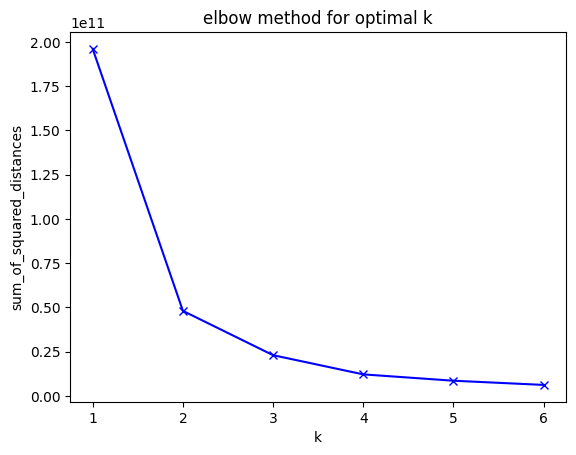

In [6]:
# OPTIMAL NUMBER "K" OF CLUSTERS

print(elbow(X,x_cat))

In [10]:
# ALGORITHM FIT

kproto = KPrototypes(n_clusters=4, init='Cao').fit(X, categorical=x_cat)    # PRECISAR el N° clusters con "n_clusters", init no se cambia  ### Metodos de inicializacion: "Cao","Huang"

In [ ]:
# CLUSTER CENTROIDS

# print('Centroides optimos de clusteres')
# print(centroides(X,kproto))

In [11]:
# CLUSTER RESULTS

print('Asignacion de clusteres segun cada observacion')
print(clusteres(df,kproto.labels_).head())

Asignacion de clusteres segun cada observacion
   ID  age     sex     bmi  children smoker     region      charges  cluster
0   1   19  female  27.900         0    yes  southwest  16884.92400        2
1   2   18    male  33.770         1     no  southeast   1725.55230        1
2   3   28    male  33.000         3     no  southeast   4449.46200        1
3   4   33    male  22.705         0     no  northwest  21984.47061        0
4   5   32    male  28.880         0     no  northwest   3866.85520        1


In [12]:
# EXPORT RESULTS
#centroides(X,kproto).to_csv('centroides.csv')
#files.download('centroides.csv')

clusteres(df,kproto.labels_).to_csv('resultados.csv')
files.download('resultados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#from google.colab import drive
#drive.mount("/content/gdrive")
